In [1]:
# Import libraries and needed classes

import sys
import os

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

from Code.LogisticRegression.logisticReg.logisticReg import LogisticRegression
from Code.utils.dataset import Dataset
import Code.utils.store_model as store_model

In [2]:
# Set random seed to control randomness

np.random.seed(42)

In [3]:
# Read datasets

dataset = Dataset('../../Dataset/DatasetsGerados/dataset_training_input.csv',
                      '../../Dataset/DatasetsGerados/dataset_training_output.csv',
                      '../../Dataset/DatasetsGerados/dataset_validation_input.csv',
                      '../../Dataset/DatasetsGerados/dataset_validation_output.csv',
                      '../../Dataset/DatasetsGerados/dataset_test_input.csv',
                      '../../Dataset/DatasetsGerados/dataset_test_output.csv')

X_train, y_train, X_validation, y_validation, X_test, y_test, ids = dataset.get_datasets('Text', 'Label', sep='\t', rem_punctuation=False)

In [4]:
import numpy as np

m_train = X_train.shape[0]
perm_train = np.random.permutation(m_train)
X_train_shuffled = X_train[perm_train]
y_train_shuffled = y_train[perm_train]

In [5]:
# Create model

n_features = X_train.shape[1]

model = LogisticRegression(n_features)

In [6]:
# Train model
model.gradient_descent(X_train_shuffled, y_train_shuffled, X_validation, y_validation, alpha=0.01, iters=50)

0.6443894728884909 0.5
0.6443894728884909
0.528744418863664 0.956
0.48892382997241746 0.618
0.45313312063323236 0.963
0.426466660046308 0.928
0.40420448277324106 0.966
0.3854685768800904 0.966
0.36921459599144246 0.968
0.35489412310490226 0.969
0.3421405257509898 0.97
0.33068982282565457 0.971
0.33068982282565457
0.32033833341184 0.973
0.3109242189562719 0.974
0.30231671570699964 0.974
0.29440892363560967 0.974
0.2871125240174957 0.975
0.28035386151848607 0.976
0.27407098236475597 0.978
0.2682113679758463 0.978
0.262730179607229 0.978
0.25758888389932666 0.978
0.25758888389932666
0.25275416581395893 0.978
0.24819706086808987 0.978
0.24389225646379456 0.978
0.23981752487360222 0.978
0.23595325965677227 0.979
0.2322820940167946 0.979
0.22878858458540532 0.978
0.22545894783090345 0.977
0.22228083908535093 0.977
0.21924316631102733 0.977
0.21924316631102733
0.21633593235586254 0.977
0.21355010070629407 0.977
0.2108774807256538 0.977
0.2083106291340224 0.977
0.2058427650913152 0.977
0.20346

In [7]:
# Calculate model cost if y_test is available

if y_test is not None:
    print("Final cost:", model.cost_function(X_test, y_test))
    print("Accuracy:", accuracy_score(y_test, model.predict_many(X_test)))

Final cost: 0.18991497353115375
Accuracy: 0.971


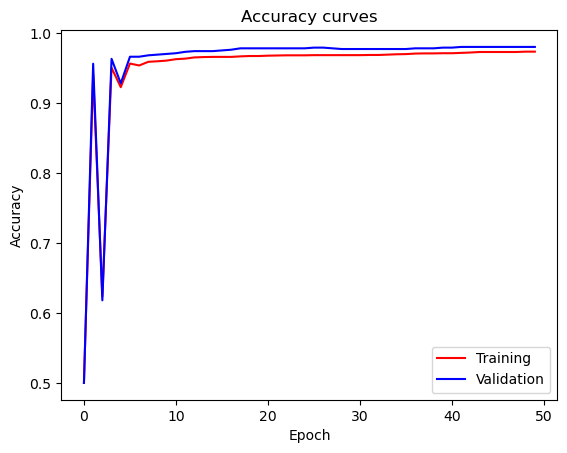

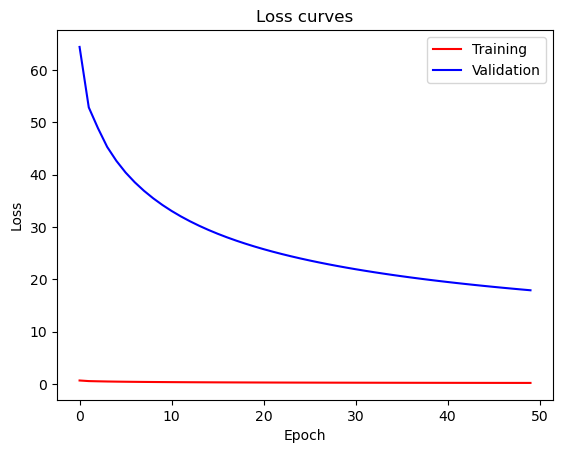

In [8]:
# Plot model

model.plot_train_curves()

In [9]:
# Test model

out = model.predict_many(X_test)
out = out.reshape(out.shape[0], 1)

In [10]:
# Store results
store_results = './Results/log_regression_results.csv'

# Ensure the directory exists
os.makedirs(os.path.dirname(store_results), exist_ok=True)

results = dataset.merge_results(ids, out)
results.to_csv(store_results, sep='\t', index=False)

In [11]:
# Store model
model_filepath = './Model/log_regression'
model_key = 'log_regression'

store_model.store_model(model_filepath, model_key, model)

In [12]:
# Retrieve model
model_filepath = './Model/log_regression'
model_key = 'log_regression'

model = store_model.retrieve_model(model_filepath, model_key)